<a href="https://colab.research.google.com/github/JohnRiv86/DeepLearning.AI-Deep-Learning-Specialization/blob/main/15_1_2_THEORY_MLP_for_images_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLP for images with Keras

In this notebook I will show you how to build and train a MLP for image classification and regression usign MNIST dataset.

In [1]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

%matplotlib inline

## Load the data

In [ ]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(f'x_train.shape = {x_train.shape} - y_train.shape = {y_train.shape}')
print(f'x_test.shape = {x_test.shape} - y_test.shape = {y_test.shape}')

11490434/11490434 [==============================] - 0s 0us/step
x_train.shape = (60000, 28, 28) - y_train.shape = (60000,)
x_test.shape = (10000, 28, 28) - y_test.shape = (10000,)


In [ ]:
len(x_train[0])

28

In [ ]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

## Feature Engineering

In [ ]:
# It's common to use MinMax(0,1) normalization for images
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255

# We can feed our MLP with squared images, we must flatten them first
x_train = x_train.reshape(len(x_train), -1)
x_test = x_test.reshape(len(x_test), -1)
print(f'New x_train.shape: {x_train.shape}')
print(f'New x_test.shape: {x_test.shape}')


New x_train.shape: (60000, 784)
New x_test.shape: (10000, 784)


In [ ]:
x_train[0].shape

(784,)

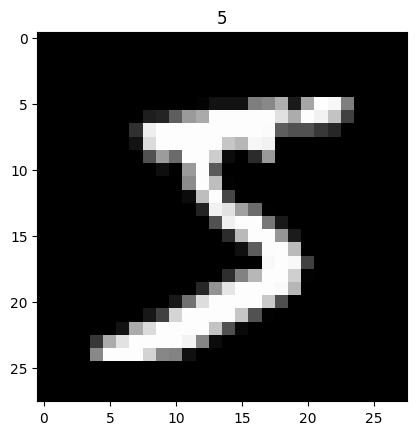

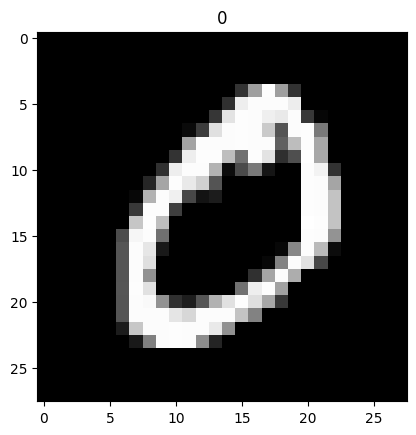

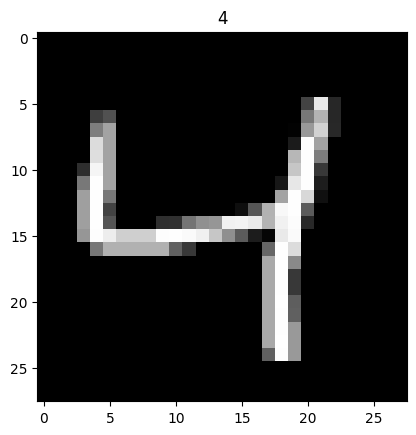

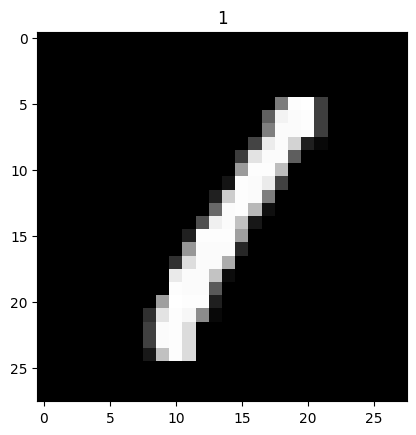

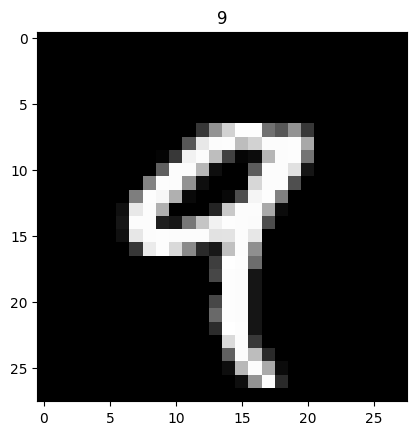

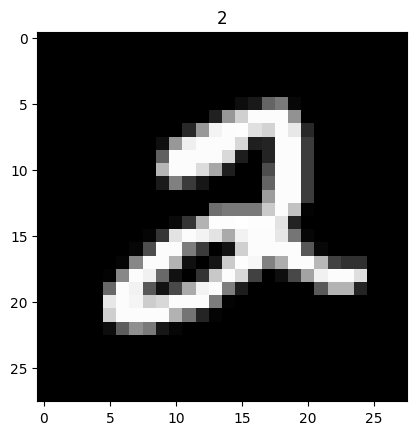

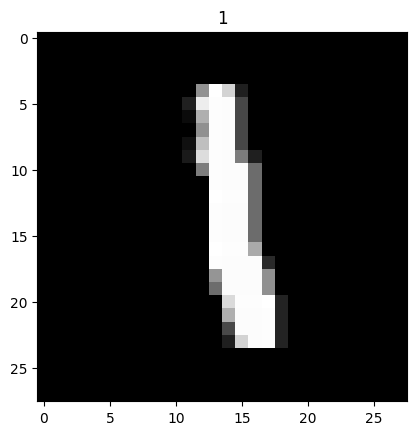

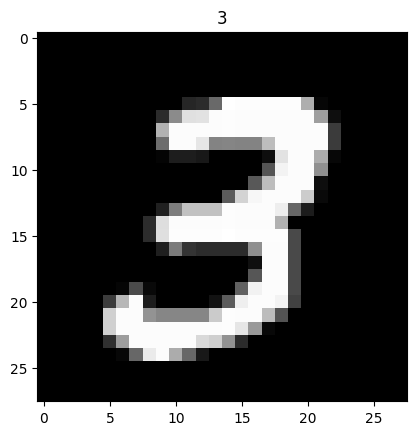

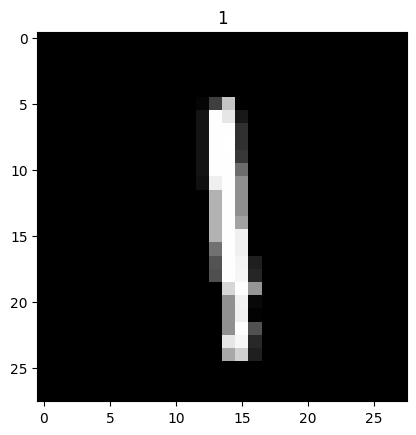

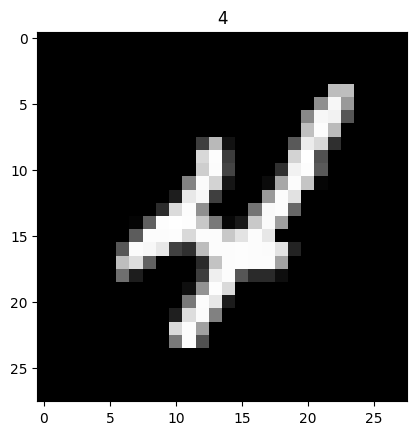

In [ ]:
# Let's visualize some images
plt.gray()
for i in range(10):
    plt.imshow(x_train[i].reshape(28, 28))
    plt.title(y_train[i])
    plt.show()

## Building the model

It will have:

    - 2 hidden layers with 16 neurons each
    - 1 output layer with 10 neurons (1 for each class)
    - Batch size of 32 during training


In [ ]:
input_shape = x_train[0].shape

# Build the model
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Dense(16, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dropout(0.1),
        layers.Dense(10, activation='softmax')
    ]
)

# Now we must copile it
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

print('Summary:')
model.summary()

Summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 13002 (50.79 KB)
Trainable params: 13002 (50.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Training the model

In [ ]:
print("\nTraining...")
history = model.fit(
    x=x_train,
    y=y_train,
    validation_split=0.2,
    epochs=15,
    batch_size=32,
    callbacks=[
      keras.callbacks.EarlyStopping(patience=2),
    ]
)


Training...
Epoch 1/15
1500/1500 [==============================] - 16s 6ms/step - loss: 0.6178 - accuracy: 0.8065 - val_loss: 0.2751 - val_accuracy: 0.9227
Epoch 2/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3342 - accuracy: 0.9016 - val_loss: 0.2180 - val_accuracy: 0.9388
Epoch 3/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2808 - accuracy: 0.9161 - val_loss: 0.2043 - val_accuracy: 0.9411
Epoch 4/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2552 - accuracy: 0.9245 - val_loss: 0.1918 - val_accuracy: 0.9455
Epoch 5/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2337 - accuracy: 0.9314 - val_loss: 0.1859 - val_accuracy: 0.9451
Epoch 6/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2188 - accuracy: 0.9349 - val_loss: 0.1742 - val_accuracy: 0.9497
Epoch 7/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2098 - accuracy: 0.9380 - val_loss: 0.1696 -

### Let's see some plots

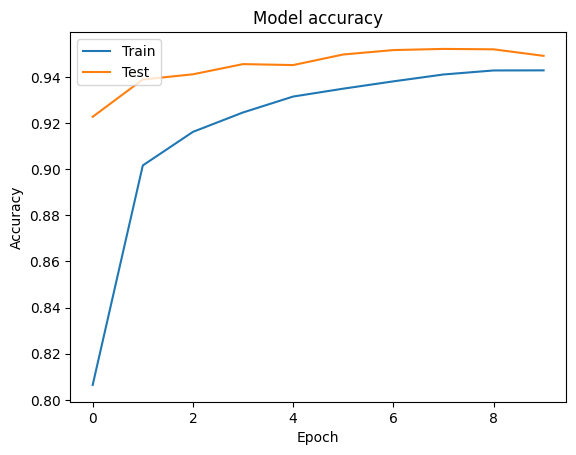

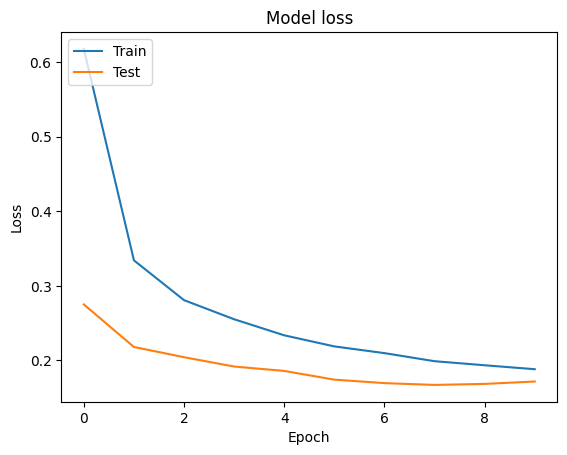

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Using the model


In [ ]:
x_test[0].shape

(784,)

In [ ]:
x_test[0].reshape(1, -1).shape

(1, 784)

In [ ]:
prediction = model.predict(x_test[0].reshape(1, -1))
prediction

1/1 [==============================] - 0s 209ms/step


array([[6.9431906e-08, 5.4681091e-06, 1.1844250e-03, 1.2218676e-04,
        5.4899687e-05, 2.8336535e-08, 3.4740226e-09, 9.9855369e-01,
        3.6776618e-07, 7.8853001e-05]], dtype=float32)

In [ ]:
pred_class = prediction.argmax(axis=1)[0]
pred_class

7

In [ ]:
prediction[0][pred_class]

0.9985537

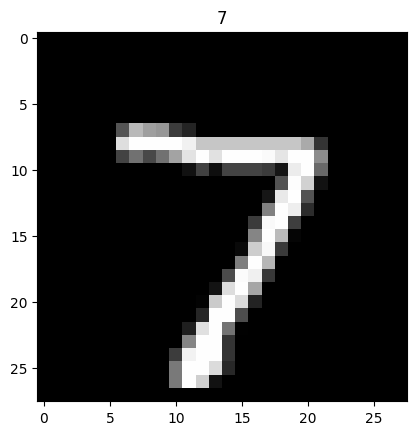

In [ ]:
plt.imshow(x_test[0].reshape(28, 28))
plt.title(y_test[0])
plt.show()

Evaluate the model on all the testing set, never used yet

In [ ]:
# Predict over test
y_test_pred = model.predict(x_test)

# Get predicted class from probabilities
y_test_pred_cat = y_test_pred.argmax(axis=1)

# Evaluamos el accuracy score
accuracy_score(y_true=y_test, y_pred=y_test_pred_cat)

313/313 [==============================] - 1s 3ms/step


0.9515

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred_cat))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.97      0.99      0.98      1135
           2       0.93      0.95      0.94      1032
           3       0.96      0.93      0.94      1010
           4       0.97      0.94      0.95       982
           5       0.92      0.93      0.92       892
           6       0.97      0.95      0.96       958
           7       0.95      0.96      0.96      1028
           8       0.96      0.92      0.94       974
           9       0.93      0.95      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



---

# MLP for regression

Let's now think this problem as a regression. We will predict one number between 0 and 9 instead a of class.


In [ ]:
# Input shape will be the same
input_shape = x_train[0].shape

# Output shape now is different!
# Note: Activation function in the output layer
# can't be softmax in this case
num_classes = 1

# Define the model
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Dense(16, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(num_classes, activation='linear')
    ]
)

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])

print('Summary:')
model.summary()


Summary:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                12560     
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12849 (50.19 KB)
Trainable params: 12849 (50.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
print("\nTraining...")
history = model.fit(
    x=x_train,
    y=y_train,
    validation_split=0.2,
    epochs=15,
    batch_size=32,
)



Training...
Epoch 1/15
1500/1500 [==============================] - 7s 3ms/step - loss: 3.0724 - mae: 1.2691 - val_loss: 1.6937 - val_mae: 0.9290
Epoch 2/15
1500/1500 [==============================] - 6s 4ms/step - loss: 1.5297 - mae: 0.8712 - val_loss: 1.3239 - val_mae: 0.7968
Epoch 3/15
1500/1500 [==============================] - 6s 4ms/step - loss: 1.2384 - mae: 0.7701 - val_loss: 1.1744 - val_mae: 0.7392
Epoch 4/15
1500/1500 [==============================] - 5s 4ms/step - loss: 1.0704 - mae: 0.7032 - val_loss: 1.0585 - val_mae: 0.6837
Epoch 5/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.9598 - mae: 0.6565 - val_loss: 0.9585 - val_mae: 0.6410
Epoch 6/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.8787 - mae: 0.6181 - val_loss: 0.8969 - val_mae: 0.6078
Epoch 7/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.8167 - mae: 0.5891 - val_loss: 0.9317 - val_mae: 0.6269
Epoch 8/15
1500/1500 [===========================

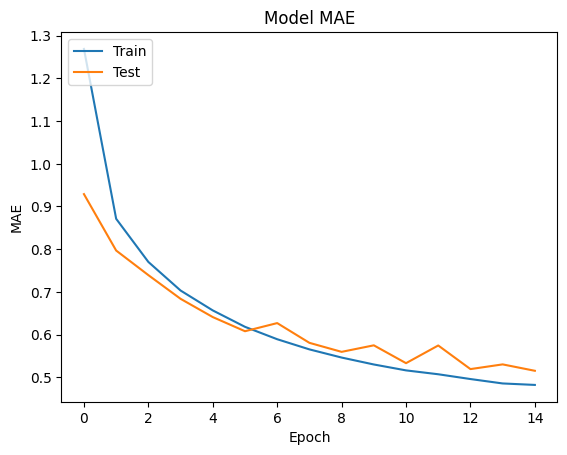

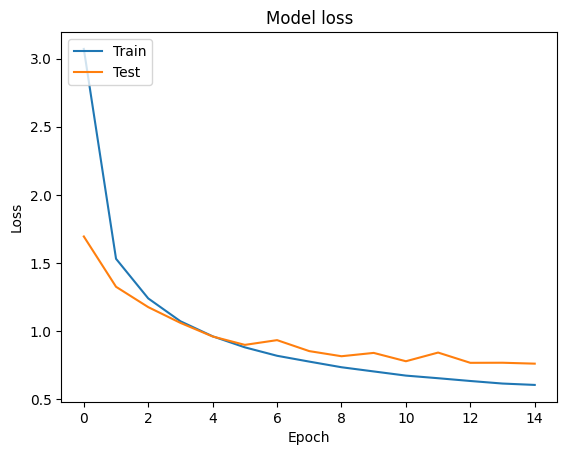

In [ ]:
# Plot training & validation MAE values
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
prediction = model.predict(x_test[1].reshape(1, -1))
prediction

1/1 [==============================] - 0s 67ms/step


array([[2.8576303]], dtype=float32)

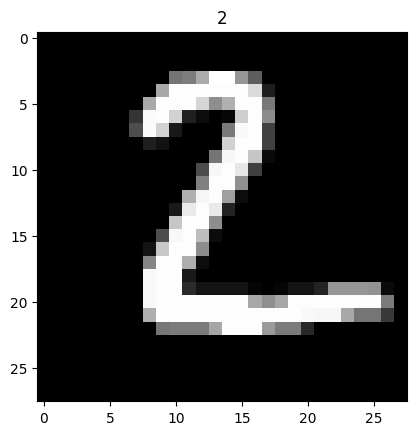

In [ ]:
plt.imshow(x_test[1].reshape(28, 28))
plt.title(y_test[1])
plt.show()